In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("/content/Virtual Patient Models_Dataset.csv")

In [4]:
df.head()

,part_id,clinical_visit,fried,gender,q_date,age,comorbidities_most_important,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1084,1,Pre-frail,M,2016-10-05T22:52:28.000Z,78,Non of the above,0,0,No,...,3 - About the same,1.2,> 5 h per week,Past smoker (stopped at least 6 months),1.5,6.0,29,6,2,5
1,1084,2,Pre-frail,M,2017-07-20T00:00:00.000Z,79,Non of the above,0,0,No,...,3 - About the same,1.0,> 5 h per week,Past smoker (stopped at least 6 months),21.0,6.0,25,7,0,6
2,1084,3,Pre-frail,M,2017-12-01T00:00:00.000Z,79,Non of the above,0,0,No,...,3 - About the same,1.3,> 5 h per week,Past smoker (stopped at least 6 months),14.0,6.0,24,7,0,6
3,1084,4,Pre-frail,M,2018-09-24T00:00:00.000Z,80,Non of the above,0,0,No,...,3 - About the same,2.5,> 5 h per week,Past smoker (stopped at least 6 months),18.0,6.0,26,8,0,7
4,1085,1,Non frail,F,2016-10-10T15:04:04.000Z,72,Non of the above,1,3,No,...,3 - About the same,2.5,> 2 h and < 5 h per week,Past smoker (stopped at least 6 months),0.0,6.0,31,11,1,10


In [5]:
# Step 2: Drop irrelevant or identifier columns
df = df.drop(columns=['part_id', 'q_date'])

In [6]:
# Fill NaN (missing values) with 0 or suitable default
print("\nChecking for Missing Values:\n")
print(df.isnull().sum().sum())
print(df.isnull().sum())  # Count missing values per column


Checking for Missing Values:

204
clinical_visit                      0
fried                               0
gender                              0
age                                 0
comorbidities_most_important        1
hospitalization_one_year            0
hospitalization_three_years         0
ortho_hypotension                   0
vision                              0
audition                            0
weight_loss                         0
exhaustion_score                    0
raise_chair_time                    0
balance_single                      0
gait_get_up                         0
gait_speed_4m                       0
gait_optional_binary                0
gait_speed_slower                   0
grip_strength_abnormal              0
low_physical_activity               0
falls_one_year                      0
fractures_three_years               0
bmi_score                           0
bmi_body_fat                       33
waist                               1
lean_body_mass 

In [7]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
# Step 4: Split into features and target
X = df.drop('fried', axis=1)
y = df['fried']

In [9]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 6: Train Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

In [11]:
clf.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = clf.predict(X_test)

In [12]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.92      1.00      0.96        11
           2       0.78      0.78      0.78         9

    accuracy                           0.83        24
   macro avg       0.79      0.76      0.77        24
weighted avg       0.82      0.83      0.83        24



In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8333333333333334


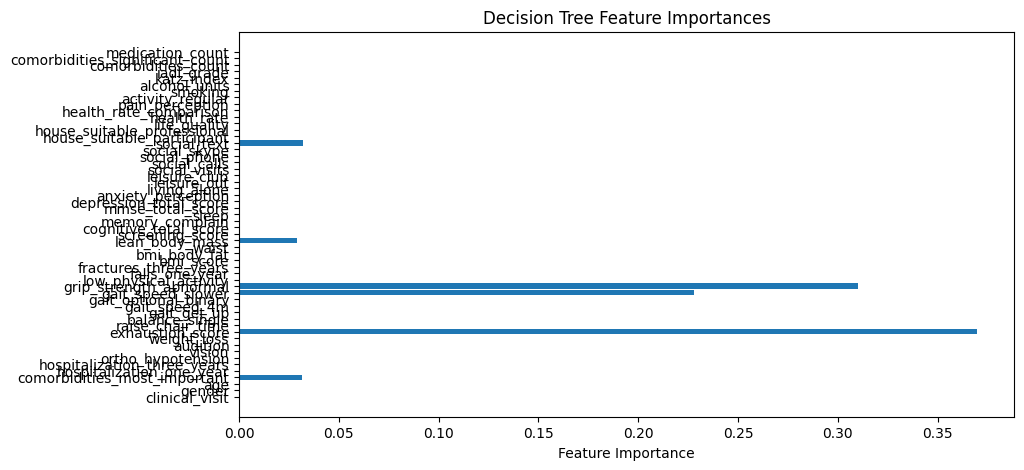

In [14]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.875
